Optimal number of clusters: 2


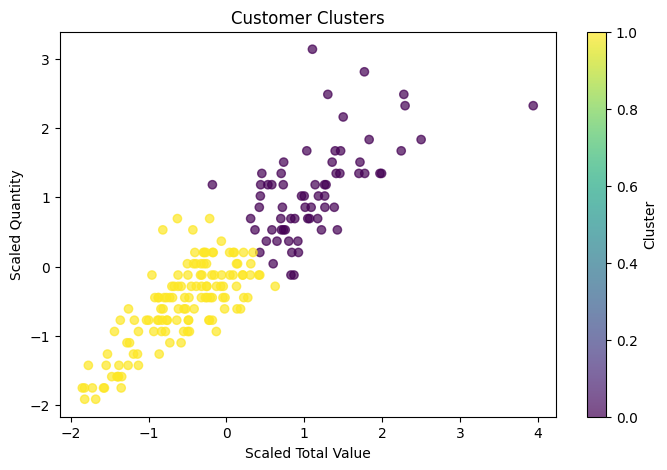

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare data
transactions = pd.read_csv('Transactions.csv')
customers = pd.read_csv('Customers.csv')
customer_features = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

data = customer_features[['TotalValue', 'Quantity']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform clustering
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    db_index = davies_bouldin_score(data_scaled, labels)
    db_scores.append(db_index)

# Optimal number of clusters
optimal_k = range(2, 11)[np.argmin(db_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Final clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(data_scaled)
customer_features['Cluster'] = labels

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title("Customer Clusters")
plt.xlabel("Scaled Total Value")
plt.ylabel("Scaled Quantity")
plt.colorbar(label="Cluster")
plt.show()

# Save results
report = f"""
Optimal Number of Clusters: {optimal_k}
DB Index: {min(db_scores)}
"""
with open("Shivam_Sharma_Clustering.pdf", "w") as f:
    f.write(report)
